In [167]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib# as plt


In [222]:
%store -r student_courses
%store -r student_majors
%store -r stem_paths
%store -r jacobs
%store -r jacobs_ethnicities
%store -r bcdi
%store -r waivers
%store -r beeps

In [137]:
waivers = waivers[waivers['ppsk'] != 'MISSING']
waivers.drop_duplicates(subset='ppsk',inplace=True)
waivers['ppsk'] = waivers['ppsk'].astype(int)

In [221]:
jacobs[jacobs['Maker Pass Holders'] == 'Y'].drop_duplicates(subset='ppsk',inplace=False)

,ppsk,year,term,DES INV Students,All Courses Students,Maker Pass Holders
0,724096,2015,Fall,Y,Y,Y
1,687168,2015,Fall,N,Y,Y
3,781707,2015,Fall,N,N,Y
4,MISSING,2015,Fall,N,N,Y
5,895798,2015,Fall,N,N,Y
...,...,...,...,...,...,...
16270,4344502,2020,Fall,N,Y,Y
16277,4345646,2020,Fall,Y,Y,Y
16308,4354716,2020,Fall,N,Y,Y
16329,4364634,2020,Fall,N,N,Y


In [224]:
waivers.drop_duplicates(subset='ppsk',inplace=False)

,ppsk,year,term,Full Waiver,Partial Waiver,Partial Exception
0,1308174,2016,Spring,Y,N,N
1,2423156,2016,Spring,Y,N,N
2,2419498,2016,Spring,Y,N,N
3,1483359,2016,Spring,Y,N,N
4,2636938,2016,Spring,Y,N,N
...,...,...,...,...,...,...
2792,2727671,2020,Spring,N,Y,N
2794,2729260,2020,Spring,N,Y,N
2795,2889350,2020,Spring,N,Y,N
2796,4094391,2020,Spring,N,Y,N


In [184]:
waivers.merge(stem_paths[~stem_paths['income.parent'].isna()][['income.parent','ppsk']], on='ppsk')

,ppsk,year,term,Full Waiver,Partial Waiver,Partial Exception,income.parent
0,2423156,2016,Spring,Y,N,N,17600.0
1,2419498,2016,Spring,Y,N,N,60000.0
2,1483359,2016,Spring,Y,N,N,21850.0
3,2636938,2016,Spring,Y,N,N,100000.0
4,2425992,2016,Spring,Y,N,N,64830.0
...,...,...,...,...,...,...,...
866,2733200,2020,Spring,N,Y,N,60000.0
867,2737897,2020,Spring,N,Y,N,100000.0
868,2750678,2020,Spring,N,Y,N,30600.0
869,2727671,2020,Spring,N,Y,N,80000.0


In [185]:
bcdi = pd.read_csv(bcdi[0])

KeyError: 0

In [186]:
bcdi = bcdi[bcdi['ppsk'] != 'MISSING']
bcdi['ppsk'] = bcdi['ppsk'].astype(int)
bcdi = bcdi[~bcdi['ppsk'].duplicated()]

### Did students who got waivers complete the design certificate?

In [187]:
graph_incomes = [0]*4

In [188]:
jacobs_cleaned = jacobs.loc[jacobs['ppsk'] != 'MISSING']
jacobs_cleaned['ppsk'] = jacobs_cleaned['ppsk'].astype(int)
jacobs_cleaned = jacobs_cleaned[~jacobs_cleaned['ppsk'].duplicated()]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [189]:
jacobs_cleaned.merge(stem_paths[~stem_paths['income.parent'].isna()][['income.parent','ppsk']], on='ppsk')['income.parent']

0        18000.0
1       150000.0
2       180000.0
3        97436.0
4       118000.0
          ...   
4562    160000.0
4563     75000.0
4564    750000.0
4565     15000.0
4566    200000.0
Name: income.parent, Length: 4567, dtype: float64

In [190]:
bcdi

,ppsk,Completed Requirements,Did Not Complete Requirements,Currently Pursuing
0,1312478,Y,N,N
1,1481454,Y,N,N
2,1473682,Y,N,N
3,2760999,Y,N,N
4,2632164,Y,N,N
...,...,...,...,...
504,4090558,N,N,Y
505,3181399,N,N,Y
506,3185794,N,N,Y
507,4328023,N,N,Y


In [191]:
graph_incomes[0] = np.mean(jacobs_cleaned.merge(stem_paths[~stem_paths['income.parent'].isna()][['income.parent','ppsk']], on='ppsk')['income.parent'])

In [192]:
graph_incomes[1] = np.mean(bcdi.merge(stem_paths[~stem_paths['income.parent'].isna()][['income.parent','ppsk']], on='ppsk')['income.parent'])

In [193]:
graph_incomes[2] = np.mean(waivers.merge(stem_paths[~stem_paths['income.parent'].isna()][['income.parent','ppsk']], on='ppsk')['income.parent'])

In [208]:
student_courses[~student_courses['ppsk'].isin(jacobs['ppsk'])]

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,year.name,ppsk,undergrad.status,course.department,course.subject,course.number,offering.type,section.number,ccn,room.share,course.title,instructor.name,grade.subtype,grade.type,grade.name,grade.points,student.credit.hours
93,2007 Summer,31341,Graduate,Near Eastern Studies,Persian,20,Primary,1,70310,70310.0,Inten Inter Persian,Jaleh Pirnazar,A,Letter Grade,A+,4.0,10.0
94,2007 Summer,33827,Graduate,German,German,10,Primary,1,48655,48655.0,Elem German Wrkshp,Meredith Kolar; Nikolaus Euba,A,Letter Grade,A+,4.0,10.0
95,2007 Summer,169335,Graduate,Near Eastern Studies,Near Eastern Studies,290A,Independent Study,3,66140,66140.0,Special Studies,Hatem Bazian,A,Letter Grade,A+,4.0,4.0
96,2007 Summer,194536,Graduate,Ethnic Studies,Ethnic Studies,135AC,Primary,2,45245,45245.0,U.S. Immigration,Catherine Choy,A,Letter Grade,A+,4.0,4.0
97,2007 Summer,198873,Undergraduate,Near Eastern Studies,Hebrew,N106,Primary,1,50010,50010.0,Elem Bibl Hebrew,Chava Boyarin,A,Letter Grade,A+,4.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23102,2019 Summer,4271436,Undergraduate,Nutritional Sciences & Tox,Nutritional Science & Tox,10,Primary,2,14561,14561.0,Intro Human Nutr,NaN,B,Letter Grade,B-,2.7,3.0
23103,2019 Summer,4271494,Undergraduate,Psychology,Psychology,166AC,Primary,1,14105,14105.0,Cultural Psychology,NaN,A,Letter Grade,A+,4.0,3.0
23104,2019 Summer,4271527,Undergraduate,Theater Dance & Perf Stds,Theater Dance & Perf Stds,10,Primary,1,14043,14043.0,Fund. Of Acting I,NaN,A,Letter Grade,A,4.0,3.0
23105,2019 Summer,4271531,Undergraduate,Interdisc Social Science Pgms,Global Studies,154M,Primary,3,15353,15353.0,Topics Middle East,NaN,A,Letter Grade,A,4.0,4.0


In [207]:
graph_incomes[3] = np.mean(student_courses[~student_courses['ppsk'].isin(jacobs['ppsk'])].merge(stem_paths[~stem_paths['income.parent'].isna()][['income.parent','ppsk']], on='ppsk')['income.parent'])

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [214]:
bcdi_incomes = pd.DataFrame(index = ['All of Jacobs', 'Certificates', 'MP Waivers', 'All Students'], 
data = [
    round(np.mean(graph_incomes[0]),0),
    round(np.mean(graph_incomes[1]),0),
    round(np.mean(graph_incomes[2]),0),
    round(np.mean(graph_incomes[3]),0)
    ])

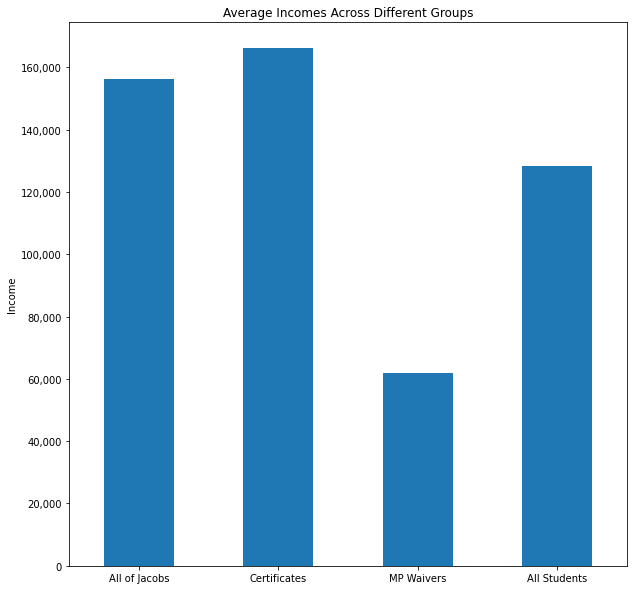

In [215]:
bcdi_incomes.plot(kind='bar', figsize = (10,10), legend=False, rot=0, ylabel = "Income", title="Average Incomes Across Different Groups").get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

In [197]:
graph_incomes

[156298.90081015983, 166149.10588235295, 61887.58783008037, 128240.77130509767]

In [198]:
#dnc_bcdi = student_courses[student_courses['ppsk'].isin(bcdi[bcdi['Did Not Complete Requirements'] == 'Y']['ppsk'])]
dc_bcdi = student_courses[student_courses['ppsk'].isin(bcdi[bcdi['Completed Requirements'] == 'Y']['ppsk'])]
dc_bcdi[dc_bcdi['course.subject'] == 'Design Innovation']
#bcdi.merge(stem_paths[['ppsk', 'ethnic.l1', 'gender']], on='ppsk', how='inner').merge(reduced_cost, on='ppsk',how='left')#.groupby(['Full Waiver','Partial Waiver','Partial Exception','Did Not Complete Requirements']).count().unstack()['ppsk']

#.merge(stem_paths[['ppsk', 'ethnic.l1', 'gender']], on='ppsk', how='left')

,year.name,ppsk,undergrad.status,course.department,course.subject,course.number,offering.type,section.number,ccn,room.share,course.title,instructor.name,grade.subtype,grade.type,grade.name,grade.points,student.credit.hours
12946,2015 Fall,2631969,Undergraduate,Engineering Science,Design Innovation,90,Primary,1,18400,101548.0,Spec Topics Des Inv,Dennis Lieu,A,Letter Grade,A+,4.0,2.0
445416,2015 Fall,1473682,Undergraduate,Engineering Science,Design Innovation,90,Primary,2,18403,18403.0,Spec Topics Des Inv,Christopher Myers; Michael Shiloh,Administrative Code,Administrative Code,Unknown,NaN,3.0
445417,2015 Fall,1473682,Undergraduate,Engineering Science,Design Innovation,90,Primary,3,18406,18406.0,Spec Topics Des Inv,Robert Hennigar,Administrative Code,Administrative Code,Unknown,NaN,2.0
470319,2015 Fall,2422735,Undergraduate,Engineering Science,Design Innovation,90,Primary,3,18406,18406.0,Spec Topics Des Inv,Robert Hennigar,Administrative Code,Administrative Code,Unknown,NaN,2.0
490774,2015 Fall,2631969,Undergraduate,Engineering Science,Design Innovation,90,Secondary,101,18402,18402.0,Spec Topics Des Inv,Dennis Lieu,Administrative Code,Administrative Code,Unknown,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6645,2019 Summer,2881722,Undergraduate,Design Innovation,Design Innovation,22,Primary,1,14718,14718.0,Prototype & Fab,NaN,B,Letter Grade,B+,3.3,3.0
7797,2019 Summer,3104636,Undergraduate,Design Innovation,Design Innovation,15,Primary,1,14734,14734.0,Design Methodology,NaN,A,Letter Grade,A-,3.7,3.0
12339,2019 Summer,3177362,Undergraduate,Design Innovation,Design Innovation,190,Primary,7,11577,11577.0,Spec Topics Des Inv,NaN,A,Letter Grade,A-,3.7,2.0
12697,2019 Summer,3180640,Undergraduate,Design Innovation,Design Innovation,15,Primary,1,14734,14734.0,Design Methodology,NaN,A,Letter Grade,A,4.0,3.0


In [199]:
dc_bcdi[~dc_bcdi['ppsk'].duplicated()].merge(stem_paths[['income.parent','ppsk']], on='ppsk')

,year.name,ppsk,undergrad.status,course.department,course.subject,course.number,offering.type,section.number,ccn,room.share,course.title,instructor.name,grade.subtype,grade.type,grade.name,grade.points,student.credit.hours,income.parent
0,2012 Fall,1312478,Undergraduate,Anthropology,Anthropology,3AC,Primary,1,2372,2372.0,Intro Soc/Cult Ac,Corinne Hayden,B,Letter Grade,B+,3.3,4.0,44000.0
1,2013 Fall,1473682,Undergraduate,Anthropology,Anthropology,3AC,Primary,1,2372,2372.0,Intro Soc/Cult Ac,Xin Liu,A,Letter Grade,A+,4.0,4.0,140000.0
2,2013 Fall,1481454,Undergraduate,Art Practice,Art Practice,8,Primary,1,4303,4303.0,Intro Vis Thinking,John Mcnamara,A,Letter Grade,A+,4.0,4.0,NaN
3,2013 Summer,1473962,Undergraduate,Art Practice,Art Practice,12,Primary,2,14030,14030.0,Lang Of Draw,Dusadee Huntrakul,A,Letter Grade,A,4.0,4.0,600000.0
4,2013 Fall,1480649,Undergraduate,Comparative Literature,Comparative Literature,R1B,Primary,6,17239,17239.0,Engl Comp World Lit,Jocelyn Saidenberg; Michael Lucey; Ramsey Mcgl...,B,Letter Grade,B-,2.7,4.0,55000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,2016 Fall,2744598,Undergraduate,Architecture,Environmental Design,1,Primary,1,12242,12242.0,Intro To Env Des,Nicholas de Monchaux,B,Letter Grade,B,3.0,3.0,100000.0
173,2016 Fall,2750707,Undergraduate,Nutritional Sciences & Tox,Nutritional Science & Tox,10,Primary,1,25877,25877.0,Intro Human Nutr,Kristen Rasmussen; Kristen Rasmussen; Marc Hel...,B,Letter Grade,B,3.0,3.0,43000.0
174,2016 Fall,2752209,Undergraduate,Philosophy,Philosophy,6,Primary,1,31457,31457.0,"Man, God/Soc W Lit",Hubert Dreyfus; Joseph Kassman-Tod; Omar Fakhri,B,Letter Grade,B,3.0,4.0,NaN
175,2016 Fall,2735521,Undergraduate,Architecture,Environmental Design,1,Primary,1,12242,12242.0,Intro To Env Des,Nicholas de Monchaux,B,Letter Grade,B-,2.7,3.0,NaN


In [200]:
dnc_bcdi = student_courses[student_courses['ppsk'].isin(bcdi[bcdi['Did Not Complete Requirements'] == 'Y']['ppsk'])]

In [201]:
dnc_bcdi[~dnc_bcdi['ppsk'].duplicated()].merge(stem_paths[['income.parent','ppsk']], on='ppsk')

,year.name,ppsk,undergrad.status,course.department,course.subject,course.number,offering.type,section.number,ccn,room.share,course.title,instructor.name,grade.subtype,grade.type,grade.name,grade.points,student.credit.hours,income.parent
0,2015 Fall,2638773,Undergraduate,"Env Sci, Policy, & Mgmt","Env Sci, Policy, & Mgmt",2,Primary,1,29153,29153.0,The Biosphere,Dennis Baldocchi,A,Letter Grade,A,4.0,3.0,189000.0
1,2015 Fall,2638811,Undergraduate,Chemistry,Chemistry,1AL,Primary,1,11312,11312.0,General Chem Lab,Matthew Hauwiller; Michelle Douskey,A,Letter Grade,A,4.0,1.0,80000.0
2,2015 Fall,2635270,Undergraduate,Comparative Literature,Comparative Literature,R1B,Primary,11,17257,17257.0,Engl Comp World Lit,Alexandra Brostoff; Taylor Johnston; Victoria ...,B,Letter Grade,B,3.0,4.0,283000.0
3,2016 Spring,2641443,Undergraduate,Nutritional Sciences & Tox,Nutritional Science & Tox,11,Primary,1,64596,64596.0,Intro To Toxicology,Daniel Nomura; Jen Chywan Wang,A,Letter Grade,A+,4.0,3.0,500000.0
4,2016 Fall,2767761,Undergraduate,Psychology,Psychology,101,Primary,1,22235,290.0,Res & Data Anal,Arman Catterson; Arman Catterson,A,Letter Grade,A,4.0,4.0,NaN
5,2016 Fall,2854279,Undergraduate,Sociology,Sociology,160,Primary,1,23553,23553.0,Sociol Of Culture,Jill Bakehorn,A,Letter Grade,A,4.0,4.0,500000.0
6,2016 Fall,2731020,Undergraduate,Economics,Economics,1,Primary,1,14421,14421.0,Intro To Economics,Andrew Spreen; Martha Olney,A,Letter Grade,A-,3.7,4.0,210000.0


In [202]:
test = bcdi[bcdi['Completed Requirements'] == 'Y']
test[test['ppsk'].duplicated()]

,ppsk,Completed Requirements,Did Not Complete Requirements,Currently Pursuing


In [203]:
test.loc[test['ppsk'] == 2734380]

,ppsk,Completed Requirements,Did Not Complete Requirements,Currently Pursuing
116,2734380,Y,N,N


In [204]:
test

,ppsk,Completed Requirements,Did Not Complete Requirements,Currently Pursuing
0,1312478,Y,N,N
1,1481454,Y,N,N
2,1473682,Y,N,N
3,2760999,Y,N,N
4,2632164,Y,N,N
...,...,...,...,...
225,2867451,Y,N,N
226,3195394,Y,N,N
227,3166566,Y,N,N
228,3150997,Y,N,N


## Could see if people who graduated are included in 'did not complete requirements'

In [205]:
student_courses[student_courses['ppsk'].isin(bcdi[bcdi['Completed Requirements'] == 'Y']['ppsk'])]

,year.name,ppsk,undergrad.status,course.department,course.subject,course.number,offering.type,section.number,ccn,room.share,course.title,instructor.name,grade.subtype,grade.type,grade.name,grade.points,student.credit.hours
164836,2012 Fall,1312478,Undergraduate,Anthropology,Anthropology,3AC,Primary,1,2372,2372.0,Intro Soc/Cult Ac,Corinne Hayden,B,Letter Grade,B+,3.3,4.0
213507,2012 Fall,1312478,Undergraduate,Nutritional Sciences & Tox,Nutritional Science & Tox,10,Primary,1,64503,64503.0,Intro Human Nutr,Nastaran Faghihnia; Robert Ryan,B,Letter Grade,B-,2.7,3.0
296268,2012 Fall,1312478,Undergraduate,Economics,Economics,C3,Primary,1,22378,204928.0,Intro To Env Econ,Peter Berck,Credit,Non-Letter Grade,Pass,NaN,4.0
296269,2012 Fall,1312478,Undergraduate,Interdisc Social Science Pgms,Peace & Conflict Studies,94,Primary,1,66730,66730.0,Meditation,Americ Azevedo,Credit,Non-Letter Grade,Pass,NaN,1.0
296270,2012 Fall,1312478,Undergraduate,UG Interdisciplinary Studies,Letters & Science,1,Primary,1,51803,51803.0,Liberal Arts,Alix Schwartz,Credit,Non-Letter Grade,Pass,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12222,2019 Summer,3176029,Undergraduate,Nutritional Sciences & Tox,Nutritional Science & Tox,W104,Primary,1,14587,14587.0,Food Culture Env,NaN,B,Letter Grade,B,3.0,3.0
12339,2019 Summer,3177362,Undergraduate,Design Innovation,Design Innovation,190,Primary,7,11577,11577.0,Spec Topics Des Inv,NaN,A,Letter Grade,A-,3.7,2.0
12697,2019 Summer,3180640,Undergraduate,Design Innovation,Design Innovation,15,Primary,1,14734,14734.0,Design Methodology,NaN,A,Letter Grade,A,4.0,3.0
12698,2019 Summer,3180640,Undergraduate,Design Innovation,Design Innovation,21,Primary,1,14735,14735.0,Vis Comm & Sketch,NaN,A,Letter Grade,A,4.0,3.0


In [206]:
bcdi[bcdi['Did Not Complete Requirements'] == 'Y']['ppsk']

230    2767761
231    3128530
232    3130717
233    2641443
234    3123364
235    2854279
236    2638811
237    2635270
238    2638773
239    2731020
Name: ppsk, dtype: int64